# Prosper Loans Data Exploration

## Introduction

This Data Exploration document explores a dataset from Prosper Loan. The dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

The purpose of this Data Exploration is to find the factors that affect a loan’s outcome status (i.e. whether loan is performing or non-performing). The features/variables are divided into two categories: Features of Loan (e.g. BorrowerAPR) and Features of Borrower (e.g. EmploymentStatus).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('prosperLoanData.csv')

## Data Wrangling

Before Data Exploration, wrangling is necessary to resolve the quality issues in this dataset. This involves ensuring the completeness of data, and extracting only the features identified in the background analysis using visual, programmatic and research tools.

In [3]:
df_clean = df.copy() 

In [4]:
#extract only identified features

cols = ["LoanStatus", "Term", "BorrowerAPR", "LoanOriginalAmount", "MonthlyLoanPayment", "ListingCategory (numeric)", 
        "ProsperScore", "EmploymentStatus", "EmploymentStatusDuration", "IsBorrowerHomeowner", "CurrentCreditLines", 
        "AvailableBankcardCredit", "DebtToIncomeRatio", "StatedMonthlyIncome"]

df_clean = df_clean[cols]

In [5]:
print(df_clean.BorrowerAPR.isna().sum())
print(df_clean.CurrentCreditLines.isna().sum())
print(df_clean.EmploymentStatusDuration.isna().sum())
print(df_clean.DebtToIncomeRatio.isna().sum())

25
7604
7625
8554


In [6]:
df_clean = df_clean.dropna(axis=0, subset=['BorrowerAPR','CurrentCreditLines','EmploymentStatusDuration', "DebtToIncomeRatio", "ProsperScore"])

In [7]:
# descriptive statistics for numeric variables
df_clean.describe()

,Term,BorrowerAPR,LoanOriginalAmount,MonthlyLoanPayment,ListingCategory (numeric),ProsperScore,EmploymentStatusDuration,CurrentCreditLines,AvailableBankcardCredit,DebtToIncomeRatio,StatedMonthlyIncome
count,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000,77543.000000
mean,42.724630,0.223727,9269.504688,295.759460,3.284681,6.062030,104.240757,10.590601,11147.484002,0.258739,5963.474057
std,11.712344,0.079159,6398.196398,189.326004,4.385117,2.362402,96.790960,5.316312,18228.112536,0.318347,5082.341185
min,12.000000,0.045830,1000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000
25%,36.000000,0.161750,4000.000000,158.490000,1.000000,4.000000,31.000000,7.000000,1112.000000,0.150000,3533.333333
50%,36.000000,0.215660,8000.000000,256.390000,1.000000,6.000000,75.000000,10.000000,4473.000000,0.220000,5000.000000
75%,60.000000,0.287800,14500.000000,392.280000,3.000000,8.000000,149.000000,13.000000,13511.500000,0.320000,7166.666667
max,60.000000,0.423950,35000.000000,2251.510000,20.000000,11.000000,755.000000,59.000000,498374.000000,10.010000,483333.333333


In [8]:
# high-level overview of data shape and composition
print(df_clean.shape)
print(df_clean.dtypes)
print(df_clean.head(10))

(77543, 14)
LoanStatus                    object
Term                           int64
BorrowerAPR                  float64
LoanOriginalAmount             int64
MonthlyLoanPayment           float64
ListingCategory (numeric)      int64
ProsperScore                 float64
EmploymentStatus              object
EmploymentStatusDuration     float64
IsBorrowerHomeowner             bool
CurrentCreditLines           float64
AvailableBankcardCredit      float64
DebtToIncomeRatio            float64
StatedMonthlyIncome          float64
dtype: object
              LoanStatus  Term  BorrowerAPR  LoanOriginalAmount  \
1                Current    36      0.12016               10000   
3                Current    36      0.12528               10000   
4                Current    36      0.24614               15000   
5                Current    60      0.15425               15000   
6                Current    36      0.31032                3000   
7                Current    36      0.23939           

### What is the structure of your dataset?

The cleaned dataset contains 77,543 Prosper loans with 14 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and others.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out the factors that affect a loan’s outcome status.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Based on visual assessment, programmatic assessment of the data and online research, it is hypothesized that features of the loan or the borrower will affect loan outcome status.

5 Features of Loan are identified: Term, BorrowerAPR, LoanOriginalAmount, MonthlyLoanPayment, ListingCategory (numeric)

8 Features of Borrower are identified: ProsperScore, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentCreditLines, AvailableBankcardCredit, DebtToIncomeRatio, StatedMonthlyIncome

## Univariate Exploration

I'll start by looking at the distribution of the feature of interest: LoanStatus.

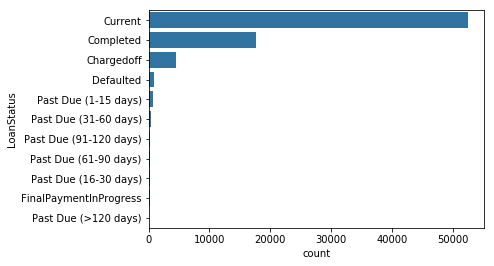

In [9]:
# start with a standard-scaled plot

base_color = sb.color_palette()[0]
sb.countplot(data=df_clean, y="LoanStatus", order=df_clean['LoanStatus'].value_counts().index, color= base_color);

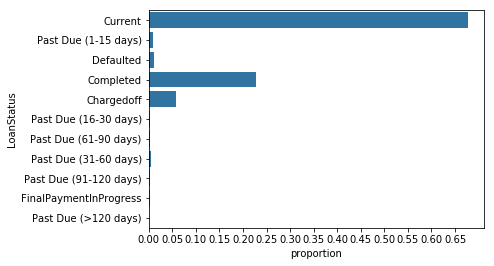

In [10]:
# create plot with relative frequency for estimate of proportions
n_points = df_clean.shape[0]
max_count = df_clean['LoanStatus'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, y= 'LoanStatus', color = base_color)
plt.xticks(tick_props * n_points, tick_names)
plt.xlabel('proportion');

LoanStatus shows predominantly performing loans - Completed or Current (>70%). Yet there is a sizeable number of non-performing loans in the category of Chargedoff. 

Given the large number of different categories, it is necessary to classify the LoanStatus in performing and non-performing. IMF's definition of non-performing loans are as follows:
1. Payments of interest and principal are past due by 90 days or more
2. At least 90 days of interest payments have been capitalized, refinanced or delayed by agreement
3. Payments are less than 90 days overdue, but there are other good reasons to doubt that payments will be made in full".

For ease of analysis, we will classify non-performing loans as Charged Off, Defaulted, and Past Due (> 1 day) are non-performing. This leaves the performing loans as Completed, Current, and FinalPaymentInProgress.

In [11]:
df_clean["LoanStatusCat"] = df_clean.LoanStatus

In [12]:
cleanup_nums = {"LoanStatusCat": {"Cancelled": "performing", "Completed": 
                                  "performing", "Current": "performing", 
                               "FinalPaymentInProgress": "performing", 
                                  "Chargedoff": "nonperforming", 
                               "Defaulted": "nonperforming", 
                                  "Past Due (1-15 days)": "nonperforming", 
                               "Past Due (16-30 days)": "nonperforming", 
                                  "Past Due (31-60 days)": "nonperforming", 
                               "Past Due (61-90 days)": "nonperforming", 
                               "Past Due (91-120 days)": "nonperforming", 
                               "Past Due (>120 days)": "nonperforming"}}

In [13]:
df_clean.replace(cleanup_nums, inplace = True)

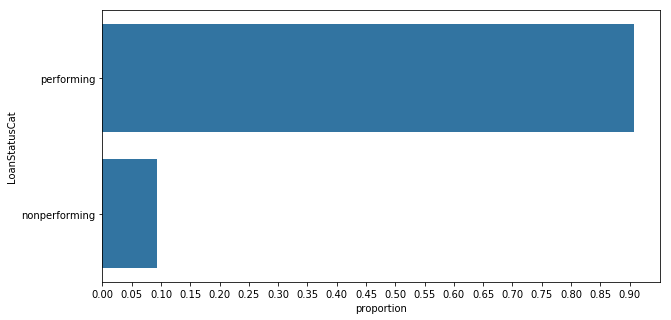

In [14]:
# create plot with relative frequency for estimate of proportions
n_points = df_clean.shape[0]
max_count = df_clean['LoanStatusCat'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
plt.figure(figsize = [10,5])
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, y= 'LoanStatusCat', color = base_color)
plt.xticks(tick_props * n_points, tick_names)
plt.xlabel('proportion');

## Features of Loan

Next, we will perform Univariate analysis on Features of Loan: Term, BorrowerAPR, LoanOriginalAmount, MonthlyLoanPayment, ListingCategory (numeric)

Our first feature is: Term.

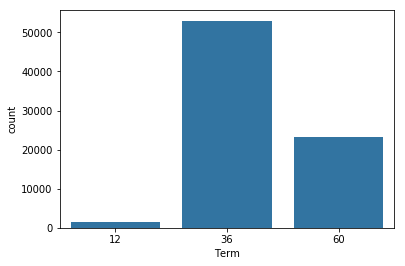

In [15]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean,x="Term",color= base_color);

Most loans are for 36 months. 60 months is half of that of 36 months. Only a small proportion is 12 months.

Next feature of Loan is BorrowerAPR.

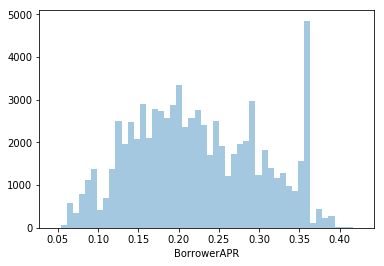

In [16]:
sb.distplot(df_clean.BorrowerAPR, kde = False);

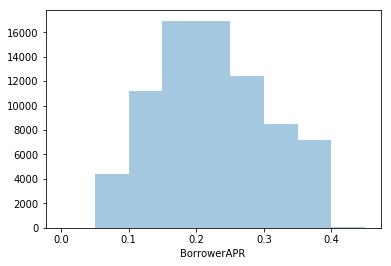

In [17]:
# investigating further on a smaller bin size

binsize = 0.05
bins = np.arange(0, df_clean.BorrowerAPR.max()+binsize, binsize)
sb.distplot(df_clean.BorrowerAPR, kde = False, bins = bins);

In [18]:
df_clean.BorrowerAPR.mean()

0.2237273440542275

BorrowerAPR is mostly uni-modal, centered around mean 22%. Interestingly, there is a spike at around 36%. According to Prosper Loans website, their APR is mostly between 6.95% – 35.99%. The spike might be due to an internal process to set the APR to the official "upper limit" for regularly occurring loan profiles. 

Next: LoanOriginalAmount

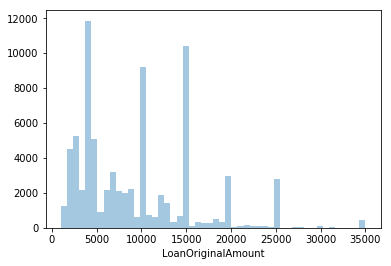

In [19]:
sb.distplot(df_clean.LoanOriginalAmount, kde = False);

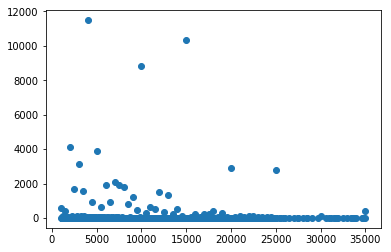

In [20]:
plt.scatter(data = df, x = df_clean.LoanOriginalAmount.value_counts().index, y = df_clean.LoanOriginalAmount.value_counts().values);

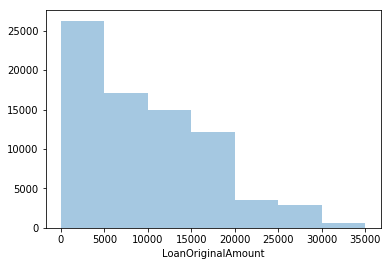

In [21]:
binsize = 5000
bins = np.arange(0, df_clean.LoanOriginalAmount.max()+binsize, binsize)
sb.distplot(df_clean.LoanOriginalAmount, kde = False, bins = bins);

Most loans are less than $15000. From the first histogram and scatter plot, we can see that there are loan amounts that are more common than others. Top 3 most common are 4000, 15000, and 10000. By changing the bin size, we can see a more general relationship between LoanOriginalAmount and count.

A separate observation is that it is interesting how the amounts are whole numbers. A hypothesis is that Prosper Loan borrowers are more likely for general use (e.g. debt consolidation), instead of for one specific purpose (e.g. wedding ring). Another surprising find is that $4000 is a more common amount than 5000. Wonder if there is a certain promotional package that encourages loans at 4000, instead of 5000 

Next: MonthlyLoanPayment

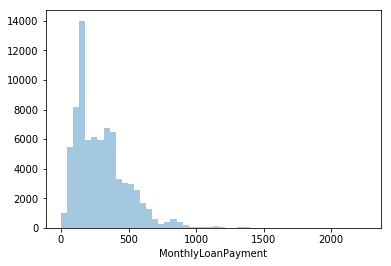

In [22]:
sb.distplot(df_clean.MonthlyLoanPayment, kde = False);

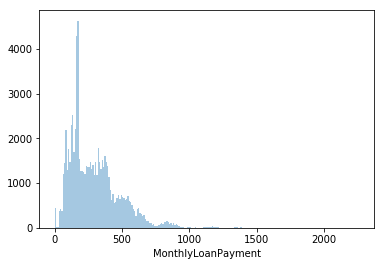

In [23]:
# investigating further on a smaller bin size

binsize = 10
bins = np.arange(0, df_clean.MonthlyLoanPayment.max()+binsize, binsize)
sb.distplot(df_clean.MonthlyLoanPayment, kde = False, bins = bins);

Most Prosper loan payments are less than $1000 , indicates the prospers services are mainly on personal loans.

On the histogram plot will smaller bins, the plot looks multi-modal. it looks like there are 4 peaks

The most common monthly loan payment is around $200 

Next: ListingCategory (numeric)

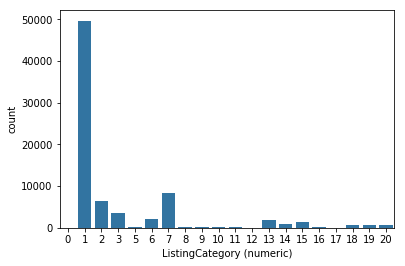

In [24]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean,x="ListingCategory (numeric)",color= base_color);

Most popular services are Debt Consolidation, Home Improvement, and Business.

Next, plotting all five features together to get an overall comparison

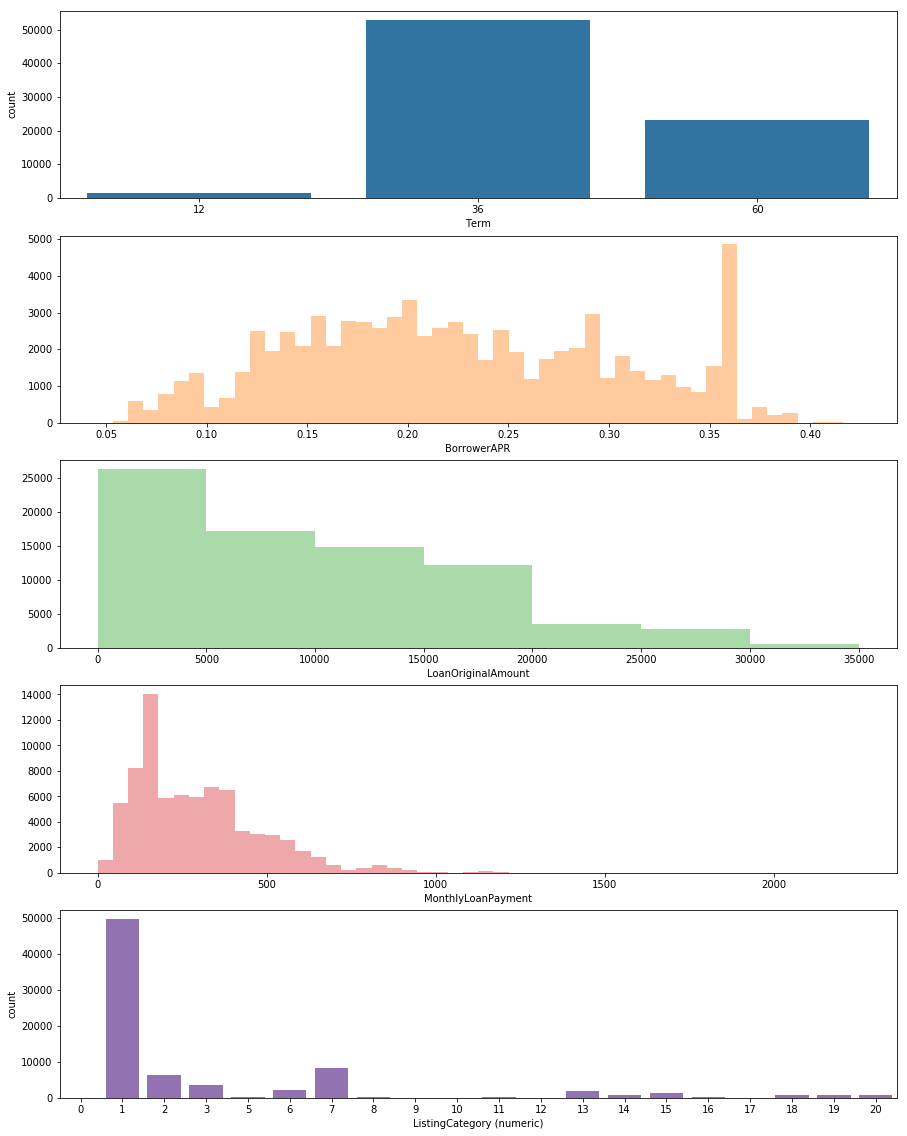

In [25]:
fig, ax = plt.subplots(nrows=5, figsize = [15,20])

sb.countplot(data=df_clean,x="Term", color = sb.color_palette()[0], ax = ax[0])

sb.distplot(df_clean.BorrowerAPR, kde = False, color = sb.color_palette()[1], ax = ax[1])

binsize = 5000
bins = np.arange(0, df_clean.LoanOriginalAmount.max()+binsize, binsize)
sb.distplot(df_clean.LoanOriginalAmount, kde = False, bins = bins, color = sb.color_palette()[2], ax = ax[2])

sb.distplot(df_clean.MonthlyLoanPayment, kde = False, color = sb.color_palette()[3], ax = ax[3])

sb.countplot(data=df_clean,x="ListingCategory (numeric)", color = sb.color_palette()[4], ax = ax[4])

plt.show()

Among the Features of Loan, BorrowerAPR and MonthlyLoanPayment are numerical variables that can be used later on for Bivariate plots. LoanOriginalAmount has several common values (e.g. $4000, 15000, and 10000). This makes the continuous variable somewhat categorical. Will not use the variable for Bivariate plots. The remaining two variables are categorical variables that can be used for Bivariate plots.

## Features of Borrower

I'll now move on to the Features of Borrower in the categories. Because of the larger number of variables, it is cleaner to break them down further into the categories below:

1. Earnings-related Features: EmploymentStatus, EmploymentStatusDuration, StatedMonthlyIncome
2. Debt-related Features: DebtToIncomeRatio
3. Credit-related Features: CurrentCreditLines, AvailableBankcardCredit 
4. Asset-related Features: IsBorrowerHomeowner
5. Aggregated Features: ProsperScore

First, we will explore the Earnings-related features, beginning with EmploymentStatus

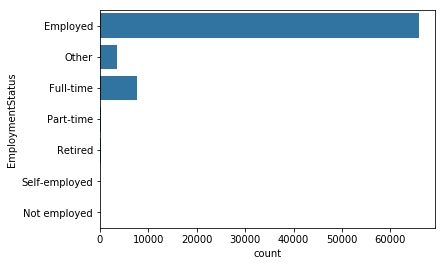

In [26]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean,y="EmploymentStatus",color= base_color);

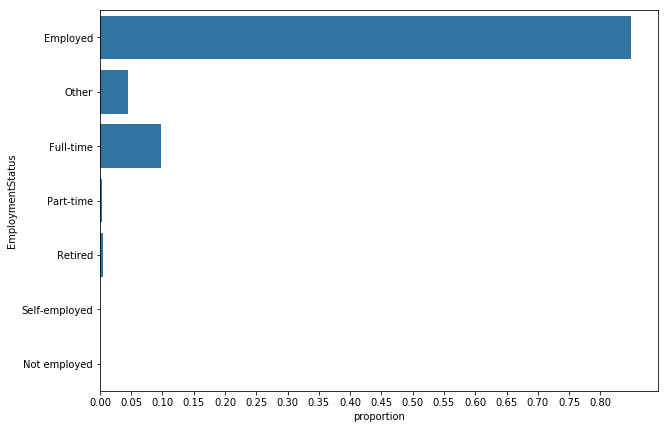

In [27]:
# create plot with relative frequency for estimate of proportions
n_points = df_clean.shape[0]
max_count = df_clean['EmploymentStatus'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# create the plot
plt.figure(figsize = [10,7])
base_color = sb.color_palette()[0]
sb.countplot(data = df_clean, y= 'EmploymentStatus', color = base_color)
plt.xticks(tick_props * n_points, tick_names)
plt.xlabel('proportion');

Most loan customers are self-employed, employed, or full-time. Only a small proportion are not employed, or retired. Due to lack of variability, it will not be meaningful to explore this further.

Next, we will explore EmploymentStatusDuration

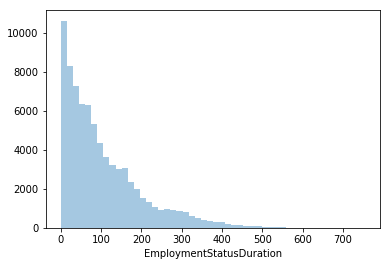

In [28]:
sb.distplot(df_clean.EmploymentStatusDuration, kde = False);

In [29]:
# remove loans with EmploymentStatusDuration greater than 500, which are outliers
df_clean = df_clean[df_clean.EmploymentStatusDuration<=500]

In [30]:
# changing unit from months to years for easier sanity check
df_clean.EmploymentStatusDuration = df_clean.EmploymentStatusDuration/12

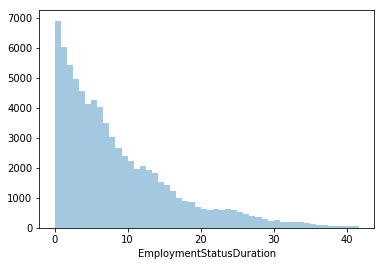

In [31]:
# investigating further after changing unit from months to years

sb.distplot(df_clean.EmploymentStatusDuration, kde = False);

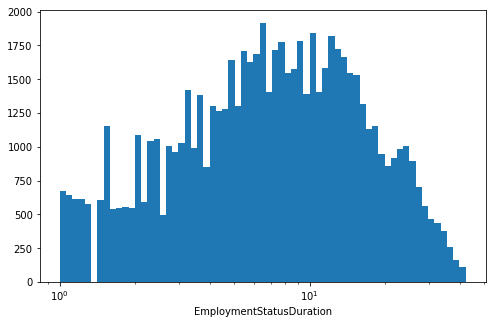

In [32]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean.EmploymentStatusDuration.max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = df_clean.EmploymentStatusDuration, bins = bins)
plt.xscale('log')
plt.xlabel('EmploymentStatusDuration')
plt.show()

Sanity check on EmploymentStatusDuration is easier when scale is changed from months to years. We can easily see that most loans are to people who have been employed for a relatively short duration (<10 years). EmploymentStatusDuration does seem in need of a log-normal transformation. No transformation is done because there are many values of 0, which will be -Inf once transformed, and not great for plotting. Removing the 0 values will is not justified, because we need to study the effect of EmploymentStatusDuration on LoanStatus.

Next: StatedMonthlyIncome

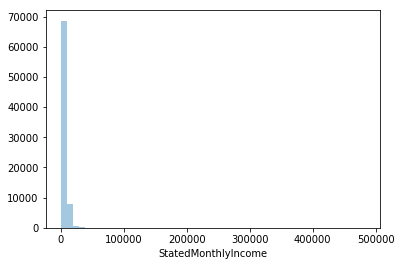

In [33]:
sb.distplot(df_clean.StatedMonthlyIncome, kde = False);

In [34]:
print(df_clean.StatedMonthlyIncome.describe())

count     77350.000000
mean       5964.655711
std        5085.587818
min           0.250000
25%        3541.666667
50%        5000.000000
75%        7166.666667
max      483333.333333
Name: StatedMonthlyIncome, dtype: float64


In [35]:
# remove loans with stated monthly income greater than 40k, which are outliers
df_clean = df_clean[df_clean.StatedMonthlyIncome<=40000]

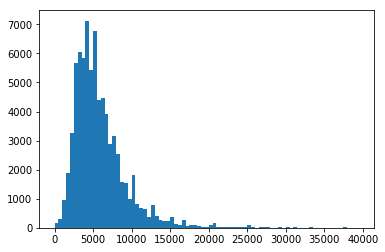

In [36]:
# Distribution of stated monthly income after setting upper limit of 50000 to eliminate outliers
bins = np.arange(0, 40000, 500)
plt.hist(data = df_clean, x = 'StatedMonthlyIncome', bins=bins);

In the original dataset, the max StatedMonthlyIncome is $1.75million. The outlier skews the first histogram. After removing it, we can more clearly see StatedMonthlyIncome's distribution. It appears to be a normal distribution

Next, we will look into Debt-related feature: DebtToIncomeRatio

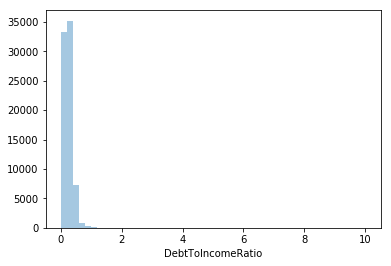

In [37]:
sb.distplot(df_clean.DebtToIncomeRatio, kde = False);

In [38]:
# remove loans with DebtToIncomeRatio greater than 1, which are outliers
df_clean = df_clean[df_clean.DebtToIncomeRatio<=1]

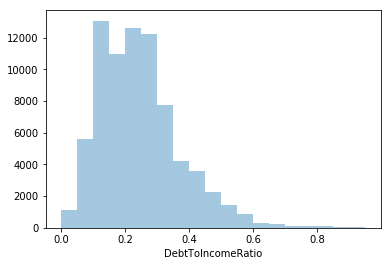

In [39]:
#investigating further on an even smaller bin size & removing outliers

bins = np.arange(0, 1, 0.05)
sb.distplot(df_clean.DebtToIncomeRatio, kde = False, bins = bins);

For background, the definition of DebtToIncomeRatio is:
"The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%)."

After removing the outliers, we can see that most borrowers have manageable DE ratio of <0.6. The outliers with DE ratio of >1 is a worrying sign, because this makes the repayment of loans more difficult.

Next Credit-related Features starting with CurrentCreditLines 

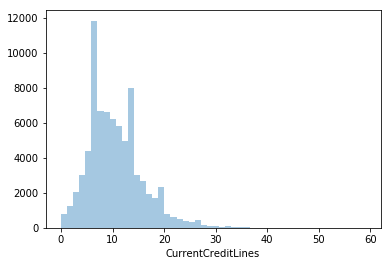

In [40]:
sb.distplot(df_clean.CurrentCreditLines, kde = False);

In [41]:
df_clean.CurrentCreditLines.describe()

count    76949.000000
mean        10.583984
std          5.310361
min          0.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         59.000000
Name: CurrentCreditLines, dtype: float64

For background, CurrentCreditLines refers to the number of current credit lines at the time the credit profile was pulled.

CurrentCreditLines has a mean of 10. This is normal, considering from EmploymentStatus, we see that most people are employed. The 10 credit lines can very well look like this:
1x Mortgage Loan
1x Car Loan
1x Personal Loan
6x Credit cards from 3 different banks

That being said, the outlier of 59 CurrentCreditLines is rather extreme.

Next: AvailableBankcardCredit

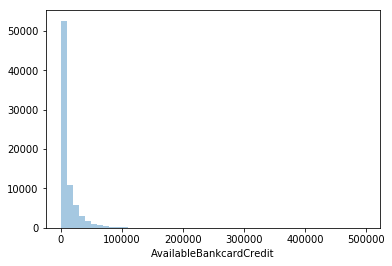

In [42]:
sb.distplot(df_clean.AvailableBankcardCredit, kde = False);

In [43]:
# remove loans with AvailableBankcardCredit greater than 120k, which are outliers
df_clean = df_clean[df_clean.AvailableBankcardCredit<=120000]

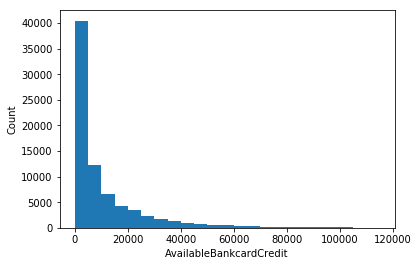

In [44]:
# Distribution of AvailableBankcardCredit by removing outliers
bins_range = np.arange(0, 120000, 5000)
plt.hist(data = df_clean, x = 'AvailableBankcardCredit', bins=bins_range);
#insert labels
plt.xlabel("AvailableBankcardCredit")
plt.ylabel("Count");

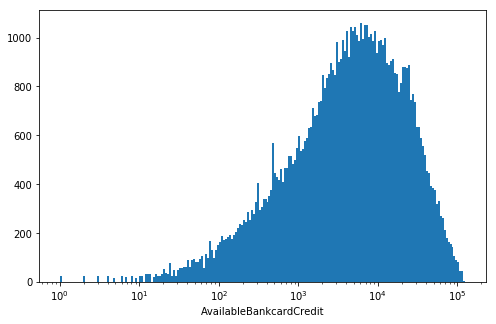

In [45]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean.AvailableBankcardCredit.max())+log_binsize, log_binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_clean, x = df_clean.AvailableBankcardCredit, bins = bins)
plt.xscale('log')
plt.xlabel('AvailableBankcardCredit')
plt.show()

AvailableBankcardCredit has a log-normal distribution. Most AvailableBankcardCredit are <$20,000, which is reasonable, considering AvailableBankcardCredit is usually tied to level of income.
     
Next is Asset-related feature IsBorrowerHomeowner

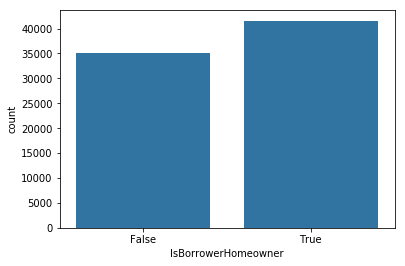

In [46]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean,x="IsBorrowerHomeowner",color= base_color);

The bar chart shows that there are slightly more homeowners than non-homeowners. But the levels are relatively even. 

Last, we have ProsperScore

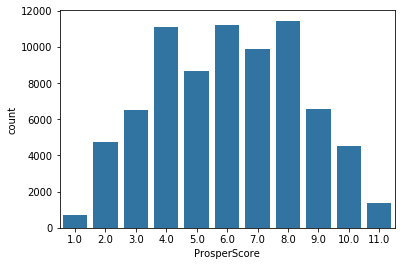

In [47]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_clean,x="ProsperScore",color= base_color);

ProsperScore has a gaussian-like shape with mean 6

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There are many categories to LoanStatus. Have classified them into performing and non-performing loans, based on IMF definition.
The distribution of performing and non-performing loans looks reasonable for a profit-maximising company

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Among the Features of Loan, there is one unusual distribution:
1. LoanOriginalAmount has several very common values (e.g. 4000, 15000, and 10000). This makes the continuous variable somewhat categorical. By changing the bin size to 5000, we can see a more general relationship between LoanOriginalAmount and count.

Among the Features of Borrower, there are three unusual distributions:
1. DebtToIncomeRatio and StatedMonthlyIncome had outliers. Had to limit the scale to eliminate outliers
2. EmploymentStatusDuration scaled the values by converting months into years.
3. EmploymentStatusDuration and AvailableBankcardCredit appears to have log-normal distribution. Have changed the axis to log scale. No transformation is done because there are many values with 0, which will be -Inf once transformed, and not great for plotting. Removing the 0 values will is not justified, because we need to study the effect of EmploymentStatusDuration on LoanStatus.


## Bivariate Exploration

To start off with, I want to look at the numerical variables using pairwise correlations, matrix scatterplot, violin plots and box plots. Next, I will look at categorical variables using clustered bar charts.

### Numerical Variables Analysis

In [48]:
numeric_vars = ['BorrowerAPR', 'MonthlyLoanPayment', 'EmploymentStatusDuration', 'StatedMonthlyIncome', 'ProsperScore', 'DebtToIncomeRatio', 'CurrentCreditLines', 'AvailableBankcardCredit']
categoric_vars = ['LoanStatusCat', 'Term', 'ListingCategory (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner']

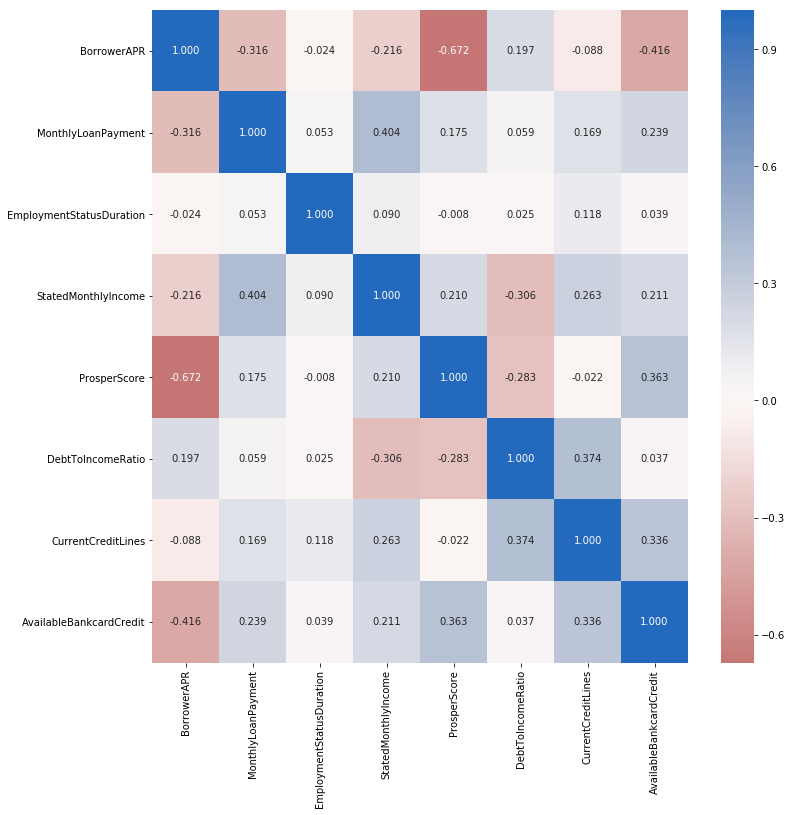

In [49]:
# pairwise correlation plot of numerical variables
plt.figure(figsize = [12, 12])
sb.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

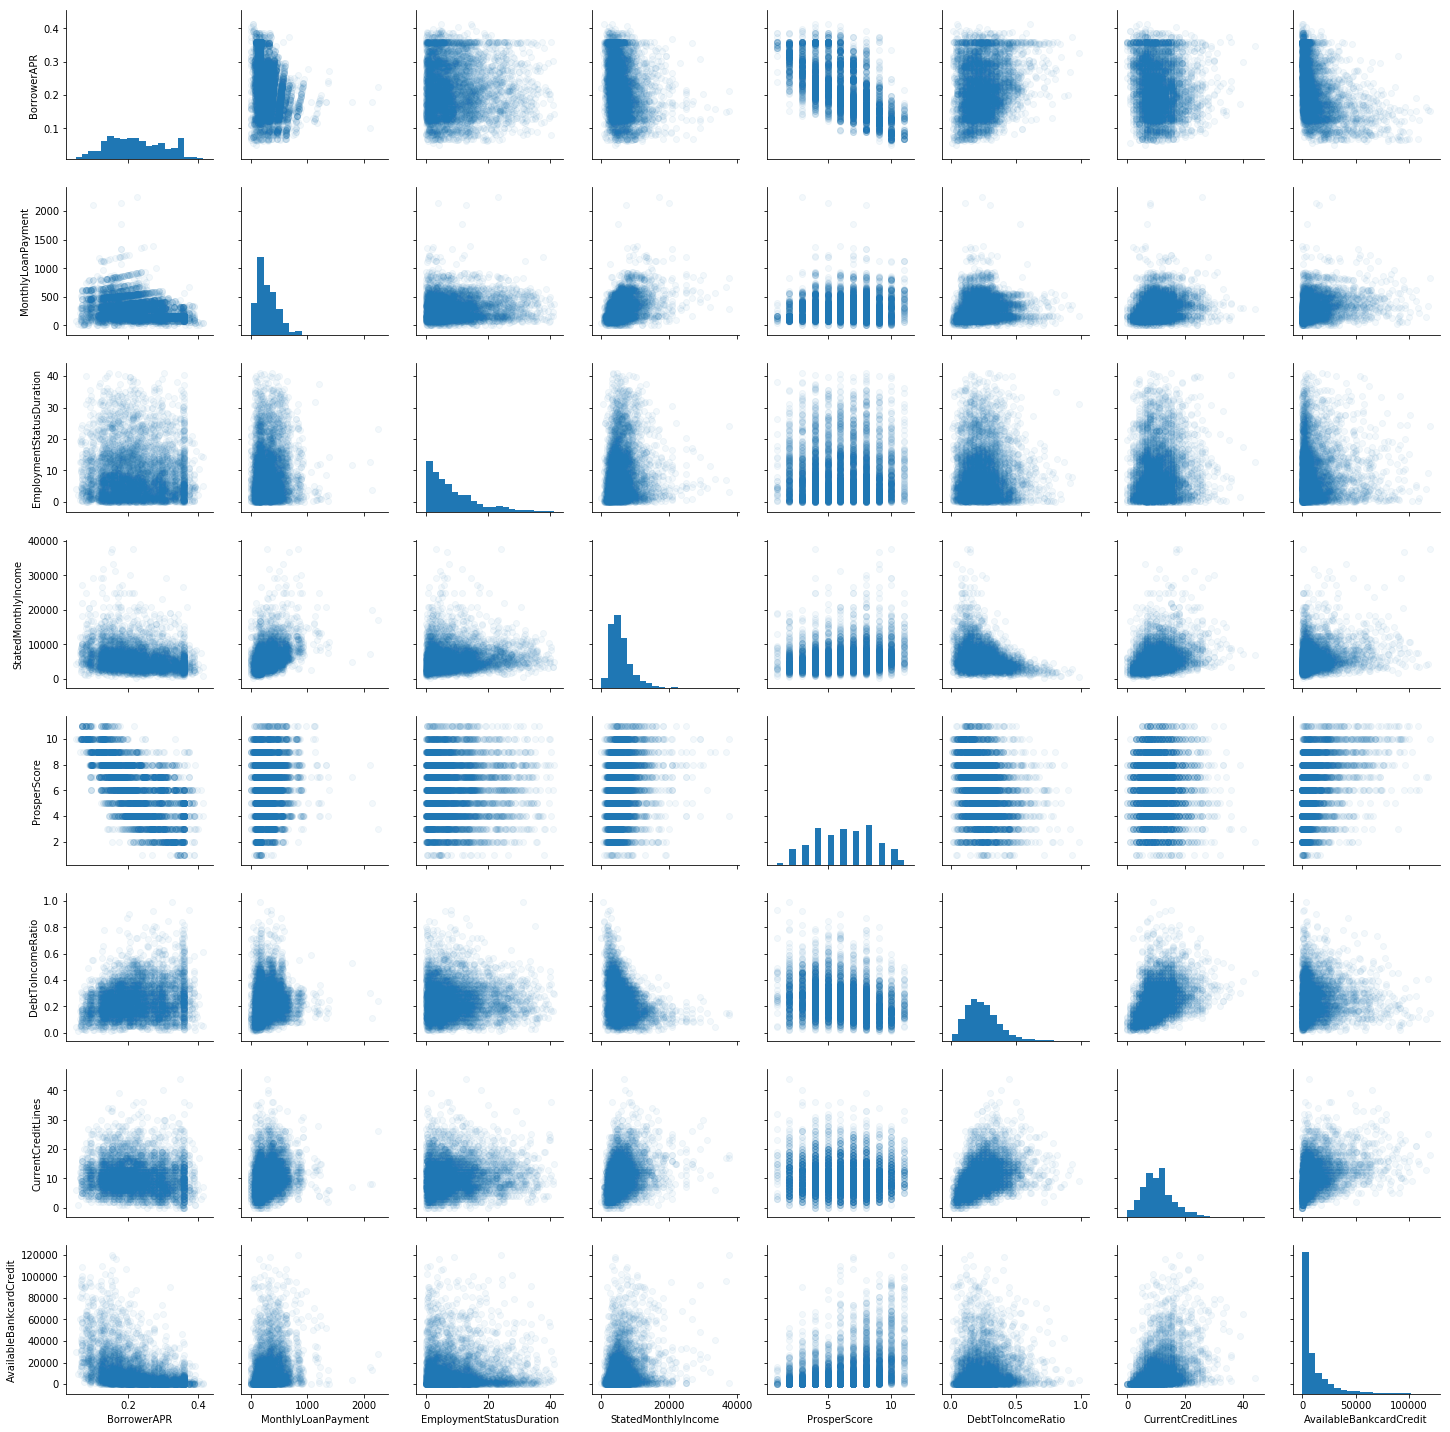

In [50]:
# matrix plot of numerical variables
# sample 5000 loans so that plots are clearer and render faster
df_clean_sample = df_clean.sample(5000)
g = sb.PairGrid(data = df_clean_sample, vars = numeric_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.05);

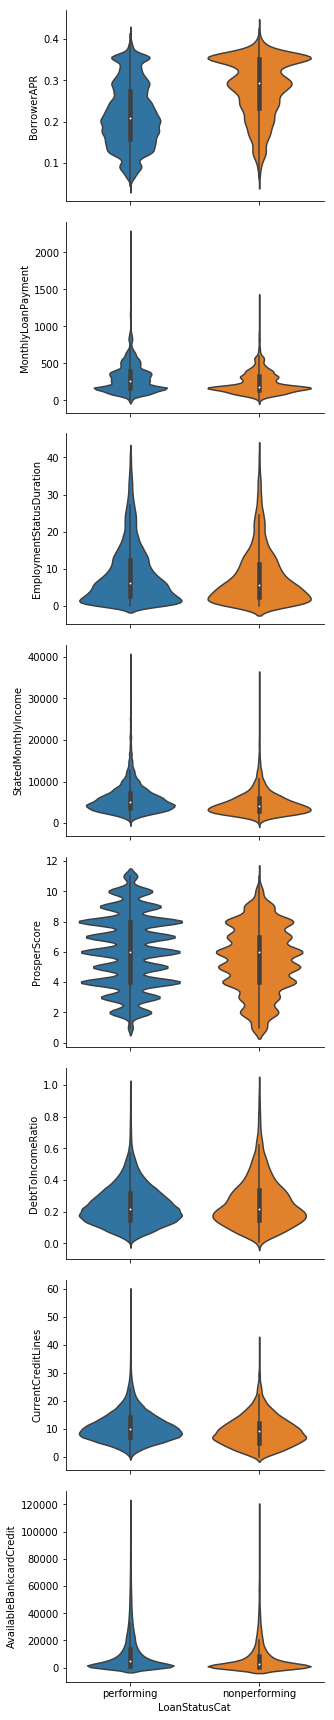

In [51]:
# plot numeric features against LoanStatus

def violingrid(x, y, **kwargs): 
    sb.violinplot(x, y)

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = df_clean, y_vars = numeric_vars, x_vars = 'LoanStatusCat',
                size = 3, aspect = 1.5);
g.map(violingrid);
plt.show();

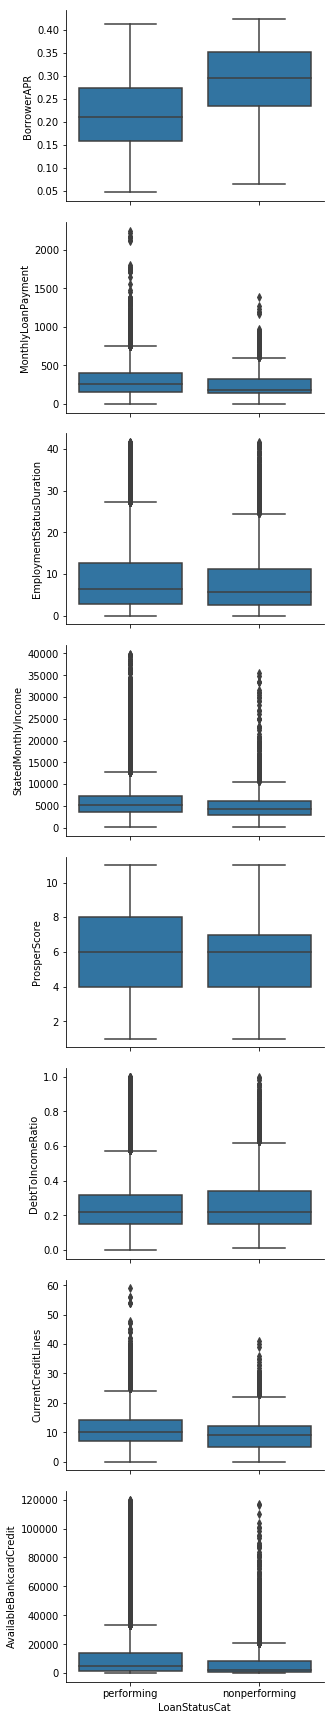

In [52]:
# plot numeric features against LoanStatus

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [20, 20])
g = sb.PairGrid(data = df_clean, y_vars = numeric_vars, x_vars = 'LoanStatusCat',
                size = 3, aspect = 1.5);
g.map(boxgrid);
plt.show();

### Categorical Variables Analysis

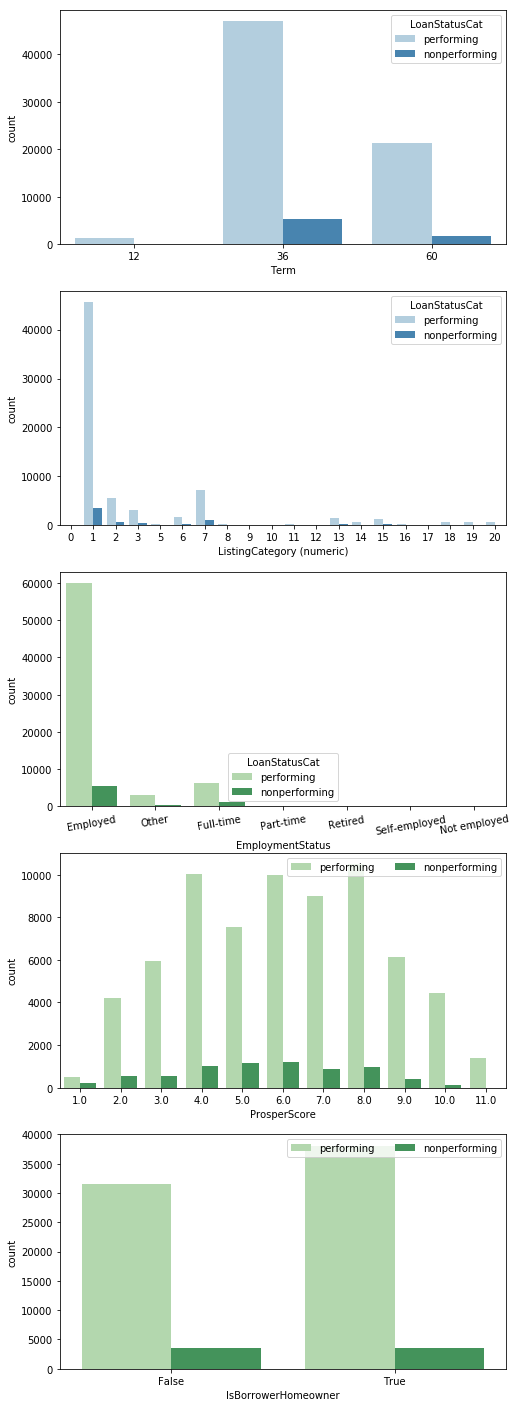

In [53]:
#clustered bar chart of categorical variables against LoanStatus

plt.figure(figsize = [8, 25])

# subplot 1
plt.subplot(5, 1, 1)
sb.countplot(data = df_clean, x = 'Term', hue = 'LoanStatusCat', palette = 'Blues')

# subplot 2
ax = plt.subplot(5, 1, 2)
sb.countplot(data = df_clean, x = 'ListingCategory (numeric)', hue = 'LoanStatusCat', palette = 'Blues')

# subplot 3
ax = plt.subplot(5, 1, 3)
sb.countplot(data = df_clean, x = 'EmploymentStatus', hue = 'LoanStatusCat', palette = 'Greens')
plt.xticks(rotation=10);

# subplot 4
ax = plt.subplot(5, 1, 4)
sb.countplot(data = df_clean, x = 'ProsperScore', hue = 'LoanStatusCat', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping


# subplot 5
ax = plt.subplot(5, 1, 5)
sb.countplot(data = df_clean, x = 'IsBorrowerHomeowner', hue = 'LoanStatusCat', palette = 'Greens')
ax.legend(loc = 1, ncol = 2); # re-arrange legend to remove overlapping

Clustered bar chart suggest that the proportions similar for the variables 

Box plots are easier to look at

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

LoanStatusCat is a categorical variable. For bivariate exploration, the relationship between LoanStatus and numerical variables are easier to observe via the boxplot, as compared to the categorical variables via the clustered bar charts.

For the numerical variables, with reference to the means and 25th/75th-percentile marks indicated in the boxplots,
1. BorrowerAPR - Low BorrowerAPR corresponds to lower likelihood of non-performing loans
2. MonthlyLoanPayment - High MonthlyLoanPayment corresponds to lower likelihood of non-performing loans 
3. EmploymentStatusDuration - High EmploymentStatusDuration corresponds to lower likelihood of non-performing loans 
4. StatedMonthlyIncome - High StatedMonthlyIncome corresponds to lower likelihood of non-performing loans 
5. CurrentCreditLines - High CurrentCreditLines corresponds to lower likelihood of non-performing loans 
6. AvailableBankcardCredit - High AvailableBankcardCredit corresponds to lower likelihood of non-performing loans 

This is as per the hypothesis that both Features of Loan (e.g. BorrowerAPR), and Features of Borrower (e.g. EmploymentStatusDuration) will affect the LoanStatus.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

From the pairwise correlation plot and scatterplot matrix, four notable relationships between features were observed: 
1. MonthlyLoanPayment and StatedMonthlyIncome appears positive linearly correlated (corr = 0.4)
2. DebtToIncomeRatio and CurrentCreditLines appears positive linearly correlated (corr = 0.38). 
3. BorrowerAPR and AvailableBankcardCredit appears negative linearly correlated (corr = -0.4). 
4. CurrentCreditLines and AmountBankcardCredit appears positive linearly correlated (corr = 0.34). 


## Multivariate Exploration

Because the Bivariate Exploration was not effective in revealing the relationship between categorical variables and LoanStatusCat, I want to make use the extra dimensions within Multivariate Exploration to explore the relationships further.

In particular, I want to explore the relationship of LoanStatusCat with ProsperScore, Term and IsBorrowerHomeowner. I seek to use MonthlyLoanPayment and BorrowerAPR as proxies for LoanStatusCat, especially since MonthlyLoanPayment and BorrowerAPR have been shown above to have an effect on LoanStatusCat.

First, I will start with ProsperScore.

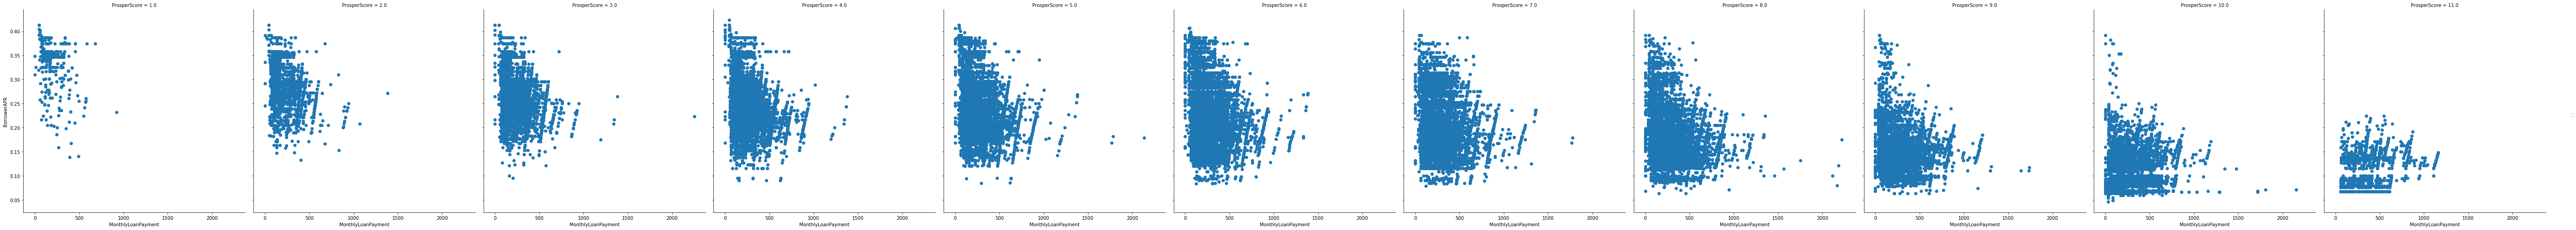

In [54]:
g = sb.FacetGrid(data = df_clean, col = 'ProsperScore', size = 7)
g.map(plt.scatter, 'MonthlyLoanPayment', 'BorrowerAPR')
g.add_legend();

Generally, one can see higher ProsperScore corresponds to lower BorrowerAPR and higher MonthlyLoanPayment.

Next: Term

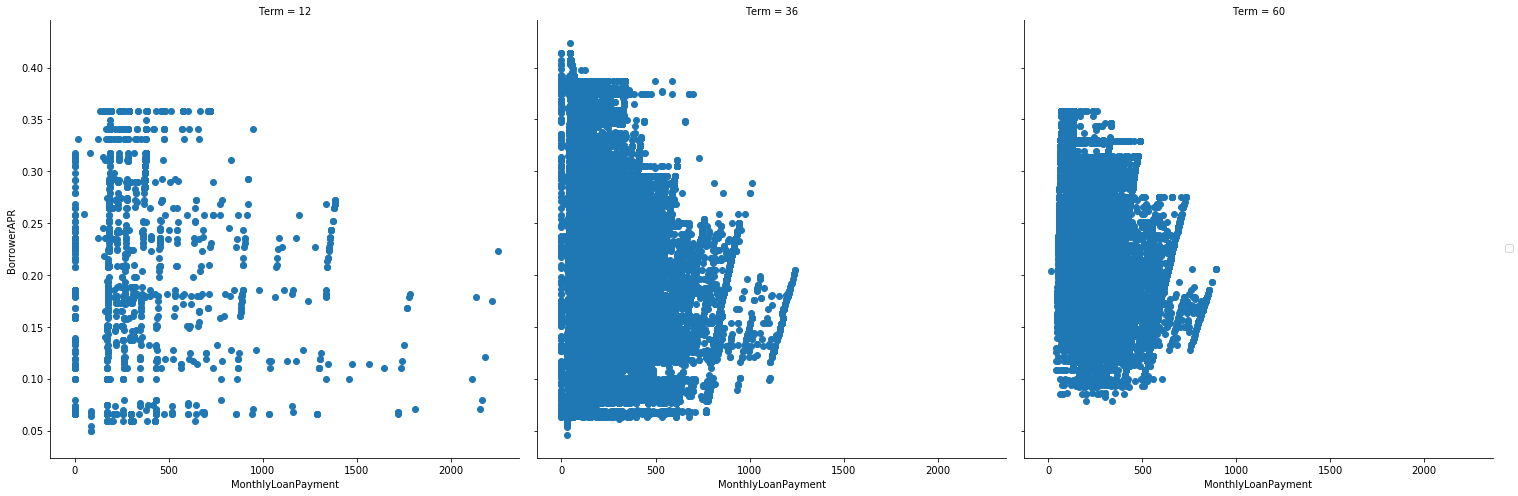

In [55]:
g = sb.FacetGrid(data = df_clean, col = 'Term', size = 7)
g.map(plt.scatter, 'MonthlyLoanPayment', 'BorrowerAPR')
g.add_legend();

It does not appear that Term has a significant effect on BorrowerAPR or MonthlyLoanPayment, except that there are more large loans (MonthlyLoanPayment > $2000) for Term = 12months

Next: IsBorrowerHomeowner

D:\Programs\Anaconda_3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


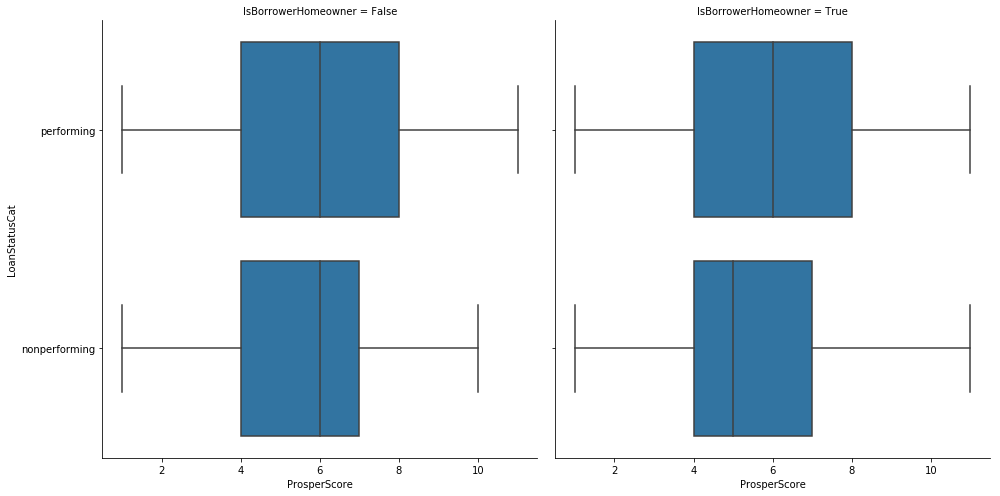

In [56]:
g = sb.FacetGrid(data = df_clean, col = 'IsBorrowerHomeowner', size = 7)
g.map(sb.boxplot, 'ProsperScore', 'LoanStatusCat');

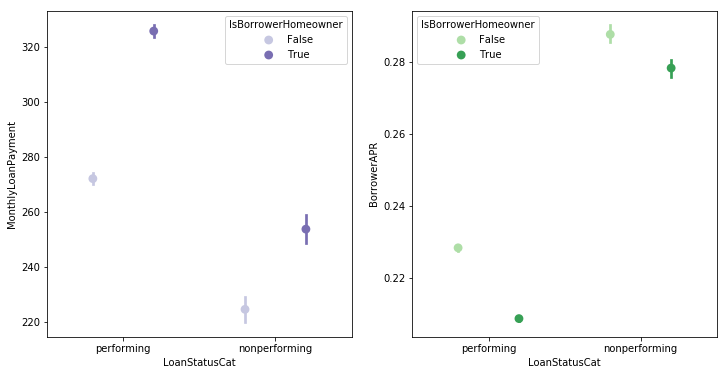

In [57]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = df_clean, x = 'LoanStatusCat', y = 'MonthlyLoanPayment', hue = 'IsBorrowerHomeowner',
           palette = 'Purples', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = df_clean, x = 'LoanStatusCat', y = 'BorrowerAPR', hue = 'IsBorrowerHomeowner',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

Generally, Homeowners have generally have higher MonthlyLoanPayment, lower BorrowerAPR, and lower ProsperScore. This makes sense because homeowners are asset-rich, and can use the house as collateral.

Next: an interesting find

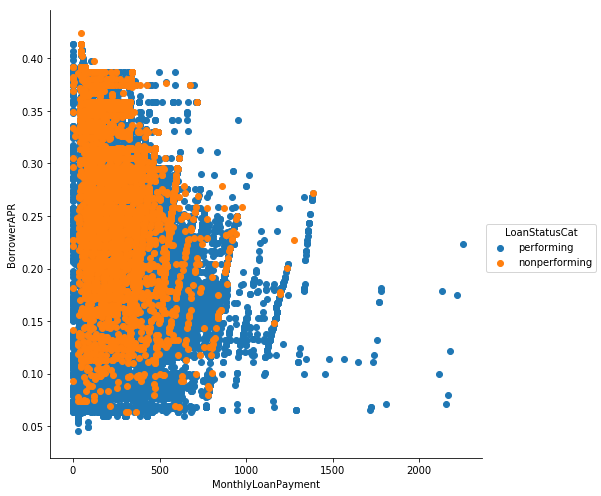

In [58]:
# MonthlyLoanPayment, BorrowerAPR, LoanStatusCat

g = sb.FacetGrid(data = df_clean, hue = 'LoanStatusCat', size = 7)
g.map(plt.scatter, 'MonthlyLoanPayment', 'BorrowerAPR')
g.add_legend();

Interesting observation is how there seem to be linear lines between MonthlyLoanPayment and BorrowerAPR (eg. at MonthlyLoanPayment > $1000). 

Next: MonthlyLoanPayment, BorrowerAPR, ProsperScore

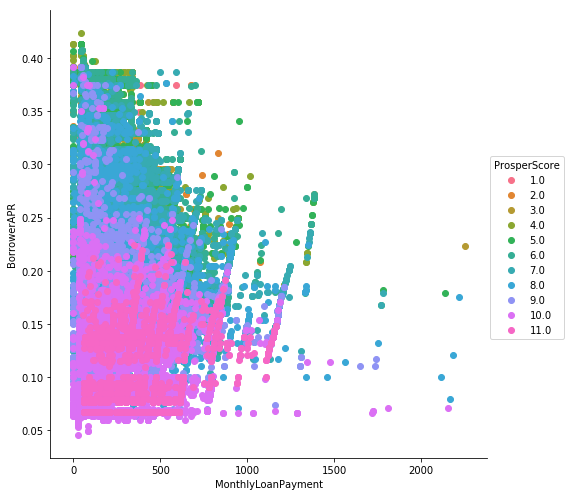

In [59]:
# MonthlyLoanPayment, BorrowerAPR, ProsperScore

g = sb.FacetGrid(data = df_clean, hue = 'ProsperScore', size = 7)
g.map(plt.scatter, 'MonthlyLoanPayment', 'BorrowerAPR')
g.add_legend();

Along those linear lines, as MonthlyLoanPayment and BorrowerAPR increases, the ProsperScore also decreases

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of LoanStatusCat against ProsperScore, Term and IsBorrowerHomeowner, by using MonthlyLoanPayment and BorrowerAPR as proxies for LoanStatusCat, especially since MonthlyLoanPayment and BorrowerAPR have been shown above to have an effect on LoanStatusCat.

The multivariate exploration here showed that there is a positive effect of ProsperScore and IsBorrowerHomeowner on LoanStatusCat through lower BorrowerAPR and higher MonthlyLoanPayment. However, there does not seem to be any significant effect of Term on LoanStatusCat.

### Were there any interesting or surprising interactions between features?

Yes, there is an interesting interaction between MonthlyLoanPayment and BorrowerAPR, especially when MonthlyLoanPayment > $1000. There seem to be independent linear lines. This shows that the features are not fully independent. Further investigation reveals that the linear lines are changes with ProsperScore.